In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Specify the data types for the columns
dtypes = {
    'INC NUMBER': 'str',
    'OCCURRED ON': 'str',
    'OCCURRED TO': 'str',
    'UCR CRIME CATEGORY': 'str',
    '100 BLOCK ADDR': 'str',
    'ZIP': 'float',
    'PREMISE TYPE': 'str',
    'GRID': 'str'
}

# Read the CSV file with specified data types
crime_data = pd.read_csv('./Resources/Crime-data.csv', dtype=dtypes)

# Drop rows with missing 'ZIP' values
crime_data = crime_data.dropna(subset=['ZIP'])

# Remove decimal points from the 'ZIP' column
crime_data['ZIP'] = crime_data['ZIP'].astype(int)

# Clean up time info
#crime_data = crime_data.dropna(subset=['OCCURRED TO'])
crime_data['OCCURRED_TO_datetime'] = pd.to_datetime(crime_data['OCCURRED TO'], errors='coerce')
crime_data['OCCURRED_TO_MMDDYY'] = crime_data['OCCURRED_TO_datetime'].dt.strftime('%m/%d/%y')
crime_data['OCCURRED_ON'] = pd.to_datetime(crime_data['OCCURRED ON'], format='%m/%d/%Y %H:%M', errors='coerce')
crime_data['OCCURRED_ON_datetime'] = crime_data['OCCURRED_ON'].dt.strftime('%m/%d/%y %H:%M')
crime_data['OCCURRED_ON_MMDDYY'] = crime_data['OCCURRED_ON'].dt.strftime('%m/%d/%y')
crime_data = crime_data.drop(columns=['OCCURRED ON', 'OCCURRED TO', 'OCCURRED_ON'])

# Display the dataframe
crime_data.head(10)

,INC NUMBER,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID,OCCURRED_TO_datetime,OCCURRED_TO_MMDDYY,OCCURRED_ON_datetime,OCCURRED_ON_MMDDYY
0,201700001603695,RAPE,38XX W CAMELBACK RD,85019,HOSPITAL,BI20,2016-03-31 00:00:00,03/31/16,11/01/15 00:00,11/01/15
1,201700001722914,LARCENY-THEFT,279XX N 23RD LN,85085,SINGLE FAMILY HOUSE,FA23,NaT,NaN,11/01/15 00:00,11/01/15
2,201500002168686,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT,BI30,2015-11-11 09:30:00,11/11/15,11/01/15 00:00,11/01/15
3,201600000527709,LARCENY-THEFT,33XX W CAMELBACK RD,85017,PARKING LOT,BJ21,2016-03-22 00:36:00,03/22/16,11/01/15 00:00,11/01/15
4,201600000052855,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE,DA19,2016-01-09 00:00:00,01/09/16,11/01/15 00:00,11/01/15
5,201500002103724,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031,APARTMENT,BH16,2015-11-01 15:21:00,11/01/15,11/01/15 00:00,11/01/15
6,201500002102668,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043,SINGLE FAMILY HOUSE,AF12,2015-11-01 11:50:00,11/01/15,11/01/15 00:00,11/01/15
7,201500002101405,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307,SINGLE FAMILY HOUSE,BJ04,2015-11-01 05:00:00,11/01/15,11/01/15 00:00,11/01/15
8,201500002102327,LARCENY-THEFT,51XX N 15TH ST,85014,APARTMENT,BJ30,2015-11-01 09:00:00,11/01/15,11/01/15 00:00,11/01/15
9,201600000594484,RAPE,13XX E ALMERIA RD,85006,SINGLE FAMILY HOUSE,BD30,NaT,NaN,11/01/15 00:00,11/01/15


PREMISE TYPE
SINGLE FAMILY HOUSE            81608
APARTMENT                      78114
PARKING LOT                    47034
STREET / ROADWAY / SIDEWALK    36032
DEPARTMENT / DISCOUNT STORE    29177
                               ...  
REST AREA                         16
STOREROOM / SHED                  14
LAKE / WATERWAY / BEACH            9
TRIBAL LANDS                       7
MILITARY INSTALLATION              6
Name: count, Length: 98, dtype: int64


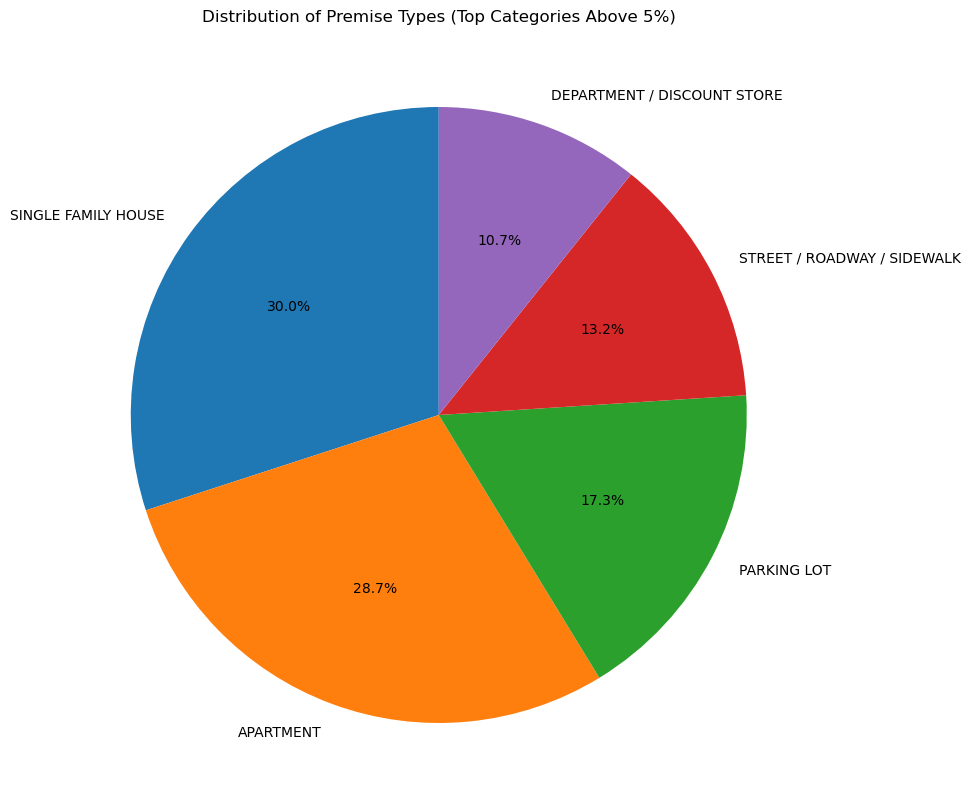

In [117]:
#check premise types and counts
premise_type_counts = crime_data['PREMISE TYPE'].value_counts()
print(premise_type_counts)

# Calculate percentages
premise_type_percentages = premise_type_counts / premise_type_counts.sum() * 100

# Identify categories below 5%
categories_below_5 = premise_type_percentages[premise_type_percentages < 5].index

#Group categories below 5% into "Other"
premise_type_counts_grouped = premise_type_counts.copy()
premise_type_counts_grouped['OTHER(BELOW 5%)'] = premise_type_counts_grouped[categories_below_5].sum()
premise_type_counts_grouped = premise_type_counts_grouped.drop(categories_below_5)
premise_type_counts_grouped = premise_type_counts_grouped.drop(labels=['OTHER(BELOW 5%)'])
crime_data_filtered = crime_data[crime_data['PREMISE TYPE'].isin(premise_type_counts_grouped.index)]
num_categories = len(premise_type_counts_grouped)

# Create the pie chart using only the top categories and 'Other'
plt.figure(figsize=(10, 10))
plt.pie(premise_type_counts_grouped.values, labels=premise_type_counts_grouped.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Premise Types (Top Categories Above 5%)')
plt.savefig('./Resources/Distribution_of_Premise_Types.png', bbox_inches='tight')
plt.show()



In [110]:
# Correlation analysis between premise type vs. crimes
# Possible occurrence of crime vs. premise type
premise_crime_summary = crime_data_filtered.groupby('PREMISE TYPE')['UCR CRIME CATEGORY'].value_counts().unstack(fill_value=0)
premise_crime_summary


UCR CRIME CATEGORY,AGGRAVATED ASSAULT,ARSON,BURGLARY,DRUG OFFENSE,LARCENY-THEFT,MOTOR VEHICLE THEFT,MURDER AND NON-NEGLIGENT MANSLAUGHTER,RAPE,ROBBERY
PREMISE TYPE,,,,,,,,,
APARTMENT,13543,310,13524,2678,28214,15977,263,2304,1301
DEPARTMENT / DISCOUNT STORE,456,22,917,392,25697,527,1,3,1162
PARKING LOT,1448,237,161,7579,25493,8274,214,216,3412
SINGLE FAMILY HOUSE,10316,552,29802,2415,27474,7394,264,2611,780
STREET / ROADWAY / SIDEWALK,7311,119,18,7012,11189,7835,204,157,2187


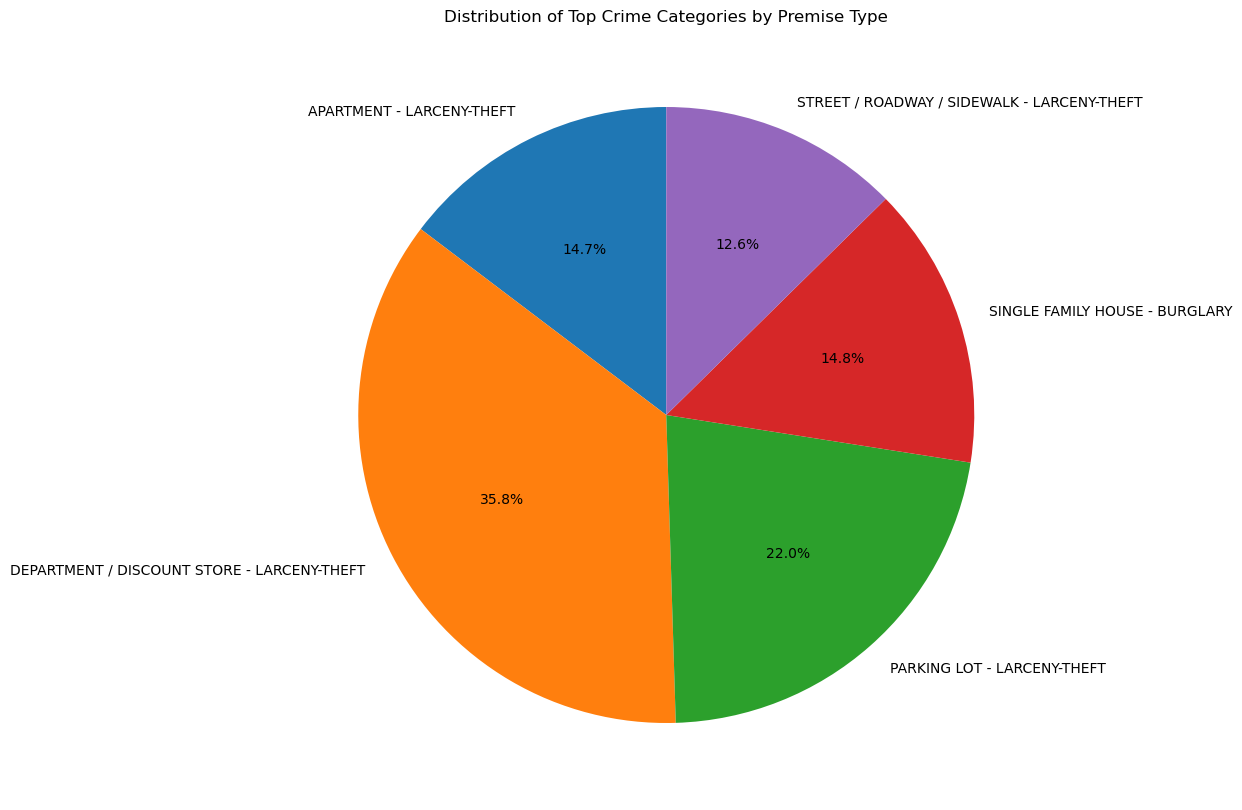

                  Premise Type Top Crime Category  Percentage  \
0                    APARTMENT      LARCENY-THEFT   36.119006   
1  DEPARTMENT / DISCOUNT STORE      LARCENY-THEFT   88.072797   
2                  PARKING LOT      LARCENY-THEFT   54.201216   
3          SINGLE FAMILY HOUSE           BURGLARY   36.518479   
4  STREET / ROADWAY / SIDEWALK      LARCENY-THEFT   31.052953   

                                Combined Label  
0                    APARTMENT - LARCENY-THEFT  
1  DEPARTMENT / DISCOUNT STORE - LARCENY-THEFT  
2                  PARKING LOT - LARCENY-THEFT  
3               SINGLE FAMILY HOUSE - BURGLARY  
4  STREET / ROADWAY / SIDEWALK - LARCENY-THEFT  


In [111]:
# Get the top crime category for each premise type
top_crime_category = premise_crime_summary.idxmax(axis=1)

# Calculate the percentage of the top crime category for each premise type
top_crime_percentage = premise_crime_summary.max(axis=1) / premise_crime_summary.sum(axis=1) * 100

# Create a DataFrame to store the results
top_crime_df = pd.DataFrame({
    'Premise Type': top_crime_category.index,
    'Top Crime Category': top_crime_category.values,
    'Percentage': top_crime_percentage.values
})
top_crime_df['Combined Label'] = top_crime_df['Premise Type'] + ' - ' + top_crime_df['Top Crime Category']
plt.figure(figsize=(10, 10))
plt.pie(top_crime_percentage.values, labels=top_crime_df['Combined Label'].values, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top Crime Categories by Premise Type')
plt.show()
#plt.savefig('./Resources/Distribution_of_Top_Crime_Categories.png')
print(top_crime_df)


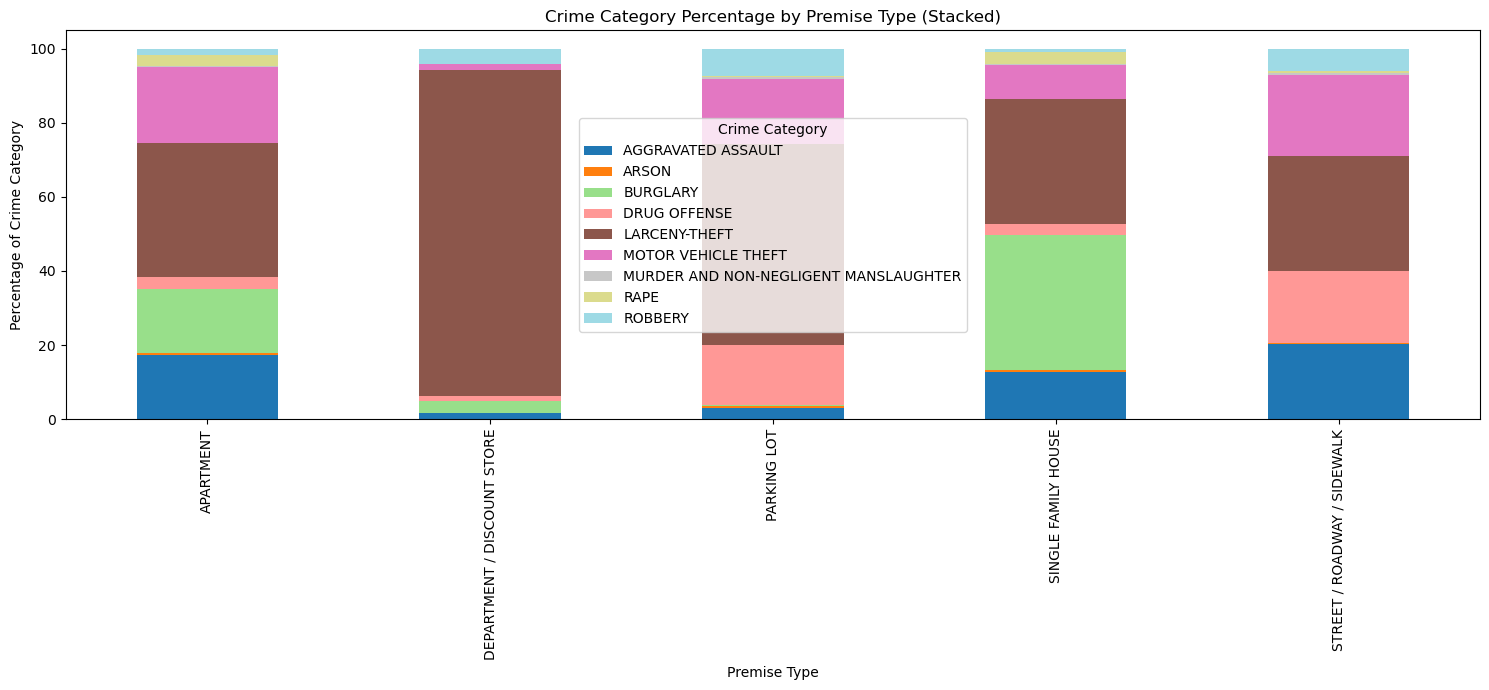

In [112]:
#Plot bar chart to analyze crime percentage pareto under each premise type
# Calculate total crime counts for each premise type
total_crime_per_premise = premise_crime_summary.sum(axis=1)

# Calculate percentages for each crime category
for col in premise_crime_summary.columns:
    premise_crime_summary[col] = (premise_crime_summary[col] / total_crime_per_premise) * 100

# Plot the stacked bar chart
premise_crime_summary.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.xlabel('Premise Type')
plt.ylabel('Percentage of Crime Category')
plt.title('Crime Category Percentage by Premise Type (Stacked)')
plt.xticks(rotation=90)
plt.legend(title='Crime Category')
plt.tight_layout()
#plt.savefig('./Resources/Crime_category_percentage_by_premise_type.png')
plt.show()

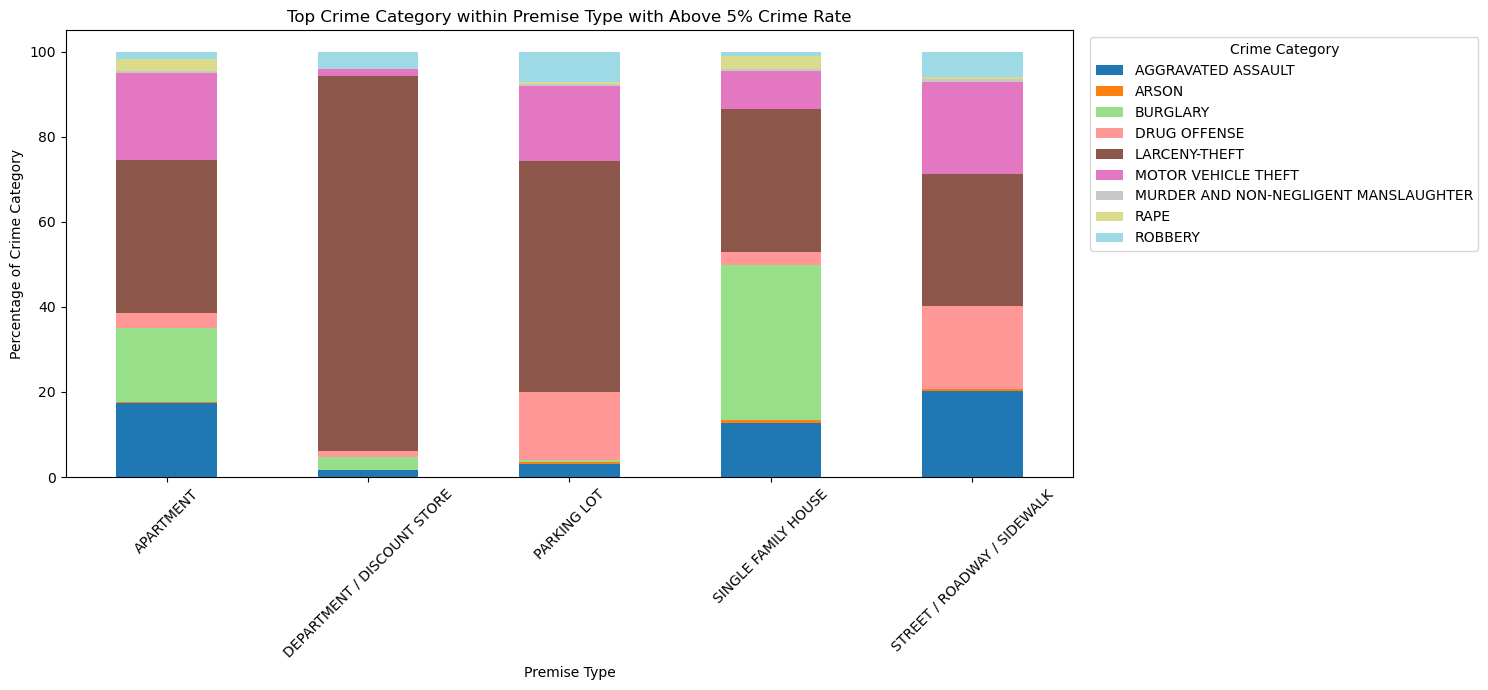

In [114]:
# Filter the data with premise types only over 1% crime cases
total_crime_percentage = (total_crime_per_premise / total_crime_per_premise.sum()) * 100

#Filter premise types with above 1% crime
filtered_premise_types = premise_type_percentages[premise_type_percentages > 1].index
filtered_crime_data = crime_data[crime_data['PREMISE TYPE'].isin(filtered_premise_types)]

# Calculate total crime counts for each premise type
total_crime_per_premise = premise_crime_summary.sum(axis=1)

# Calculate percentages for each crime category
for col in premise_crime_summary.columns:
    premise_crime_summary[col] = (premise_crime_summary[col] / total_crime_per_premise) * 100

# Plot the stacked bar chart using the filtered data
premise_crime_summary.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.xlabel('Premise Type')
plt.ylabel('Percentage of Crime Category')
plt.title('Top Crime Category within Premise Type with Above 5% Crime Rate')
plt.xticks(rotation=45)
plt.legend(title='Crime Category', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.savefig('./Resources/Crime_category_percentage_by_top_premise_types.png')
plt.show()

In [88]:
# Plot filtered data against total percentage

